## Daymet data  

In [1]:
import springtime
from springtime.datasets.daymet import DaymetSinglePoint, DaymetMultiplePoints, DaymetBoundingBox

Creating folder /tmp/data


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import math
import folium

### Data from a point

In [3]:
#The latitude of Washington, the USA is 47.751076, and the longitude is -120.740135
target_lat = 47.751076
target_lon = -120.740135


In [4]:
dataset = DaymetSinglePoint(point=(target_lon,target_lat), years=[1990, 2020])
dataset

DaymetSinglePoint(dataset='daymet_single_point', point=(-120.740135, 47.751076), years=(1990, 2020))

In [5]:
dataset.download()
df_wa_point = dataset.load()
df_wa_point.head()


R version 4.2.1 (2022-06-23) -- "Funny-Looking Kid"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: aarch64-unknown-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

>         library(daymetr)
>         daymetr::download_daymet(
+             site = "daymet_single_point_-120.740135_47.751076",
+             lat = 47.751076,
+             lon = -120.740135,
+             start = 1990,
+             end =  2020,
+             path="/tmp/data",
+             interna

>         
> 


Done !



,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa)
0,1990,1,29818.61,12.68,86.56,66.10,2.14,-2.68,501.57
1,1990,2,29875.77,10.44,114.20,66.00,1.47,-5.76,397.66
2,1990,3,29937.57,7.58,98.15,65.27,1.33,-4.27,445.06
3,1990,4,30003.96,15.35,111.24,63.49,5.19,-1.76,537.01
4,1990,5,30074.88,11.16,109.80,61.99,4.23,-2.43,510.71


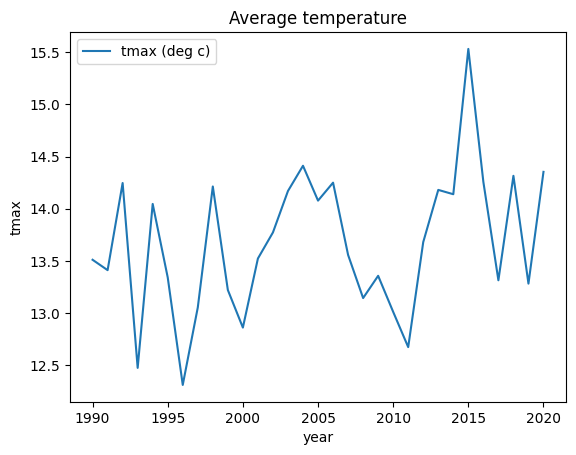

In [6]:
ts1 = df_wa_point.groupby('year', as_index=False)['tmax (deg c)'].mean()
ts1.plot(x="year",y="tmax (deg c)")
plt.title('Average temperature')
plt.ylabel('tmax')

plt.show()

### Data from multiple points

In [7]:
#The latitude of Washington, the USA is 47.751076, and the longitude is -120.740135
target_lat1 = 47.751076
target_lon1 = -120.740135
# The latitude of New York City, NY, USA is 40.730610, and the longitude is -73.935242.
target_lat2 = 40.730610
target_lon2 = -73.935242
# The latitude of Tennessee, USA is 35.860119, and the longitude is -86.660156. Tennessee,
target_lat3 = 35.860119
target_lon3 = -86.660156

dataset = DaymetMultiplePoints(points=[(target_lon1,target_lat1),(target_lon2,target_lat2),(target_lon3,target_lat3)], years=[1990, 2020])
dataset

DaymetMultiplePoints(dataset='daymet_multiple_points', points=[(-120.740135, 47.751076), (-73.935242, 40.73061), (-86.660156, 35.860119)], years=(1990, 2020))

In [8]:
dataset.download()
df_wa_points = dataset.load()
df_wa_points.head()


R version 4.2.1 (2022-06-23) -- "Funny-Looking Kid"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: aarch64-unknown-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

>         library(daymetr)
>         daymetr::download_daymet(
+             site = "daymet_single_point_-73.935242_40.73061",
+             lat = 40.73061,
+             lon = -73.935242,
+             start = 1990,
+             end =  2020,
+             path="/tmp/data",
+             internal = 


Done !



>         
> 

R version 4.2.1 (2022-06-23) -- "Funny-Looking Kid"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: aarch64-unknown-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

>         library(daymetr)
>         daymetr::download_daymet(
+             site = "daymet_single_point_-86.660156_35.860119",
+             lat = 35.860119,
+             lon = -86.660156,
+             start = 1990,
+             end =  2020,
+             path="/tmp/data",
+        


Done !



>         
> 


,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa),x,y,geometry
0,1990,1,29818.61,12.68,86.56,66.10,2.14,-2.68,501.57,-120.740135,47.751076,POINT (-120.74013 47.75108)
1,1990,2,29875.77,10.44,114.20,66.00,1.47,-5.76,397.66,-120.740135,47.751076,POINT (-120.74013 47.75108)
2,1990,3,29937.57,7.58,98.15,65.27,1.33,-4.27,445.06,-120.740135,47.751076,POINT (-120.74013 47.75108)
3,1990,4,30003.96,15.35,111.24,63.49,5.19,-1.76,537.01,-120.740135,47.751076,POINT (-120.74013 47.75108)
4,1990,5,30074.88,11.16,109.80,61.99,4.23,-2.43,510.71,-120.740135,47.751076,POINT (-120.74013 47.75108)


/tmp/ipykernel_9523/2196454111.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_wa_points.groupby(['year','x']).mean()['tmax (deg c)'].unstack().plot(ax=ax)


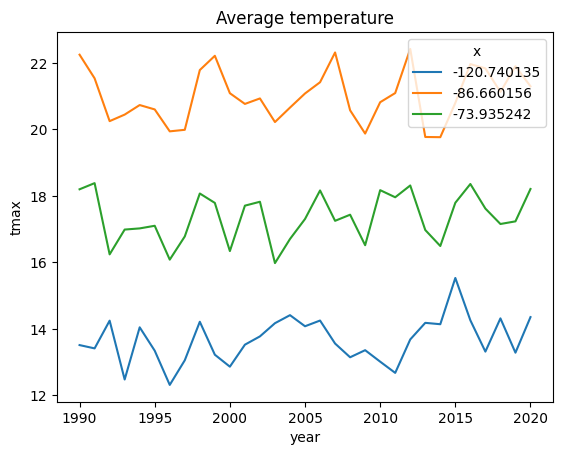

In [9]:
# plot data
fig, ax = plt.subplots()
df_wa_points.groupby(['year','x']).mean()['tmax (deg c)'].unstack().plot(ax=ax)
plt.title('Average temperature')
plt.ylabel('tmax')
# plt.xticks(rotation=45)
plt.show()

### Data from a boundingbox

In [10]:
def get_bounding_box(latitude_in_degrees, longitude_in_degrees, half_side_in_km):
    assert half_side_in_km > 0
    assert latitude_in_degrees >= -90.0 and latitude_in_degrees  <= 90.0
    assert longitude_in_degrees >= -180.0 and longitude_in_degrees <= 180.0

    lat = math.radians(latitude_in_degrees)
    lon = math.radians(longitude_in_degrees)

    radius  = 6371
    # Radius of the parallel at given latitude
    parallel_radius = radius*math.cos(lat)

    lat_min = lat - half_side_in_km/radius
    lat_max = lat + half_side_in_km/radius
    lon_min = lon - half_side_in_km/parallel_radius
    lon_max = lon + half_side_in_km/parallel_radius
    rad2deg = math.degrees

    box = (rad2deg(lon_min),rad2deg(lat_min),rad2deg(lon_max),rad2deg(lat_max))

    return (box)

In [11]:
# boundingbox around Washington
half_side_in_km = 50
bbox = get_bounding_box(target_lat,target_lon,half_side_in_km)
bbox

(-121.40892188082722,
 47.30141519704063,
 -120.07134811917277,
 48.20073680295936)

In [12]:
dataset = DaymetBoundingBox(box=bbox, years=[2019, 2020])
dataset

DaymetBoundingBox(dataset='daymet_bounding_box', box=(-121.40892188082722, 47.30141519704063, -120.07134811917277, 48.20073680295936), years=(2019, 2020), mosaic='na', variables=('dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp'), frequency='daily')

In [13]:
dataset.download()

(-121.40892188082722, 47.30141519704063, -120.07134811917277, 48.20073680295936)

R version 4.2.1 (2022-06-23) -- "Funny-Looking Kid"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: aarch64-unknown-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

>         library(daymetr)
>         daymetr::download_daymet_ncss(
+             location = c(-121.40892188082722,47.30141519704063,-120.07134811917277,48.20073680295936),
+             start = 2019,
+             end =

Creating a subset of the Daymet data
        be patient, this might take a while!

https://thredds.daac.ornl.gov/thredds/ncss/ornldaac/1840/daymet_v4_daily_na_dayl_2019.nc


https://thredds.daac.ornl.gov/thredds/ncss/ornldaac/1840/daymet_v4_daily_na_prcp_2019.nc


https://thredds.daac.ornl.gov/thredds/ncss/ornldaac/1840/daymet_v4_daily_na_srad_2019.nc


https://thredds.daac.ornl.gov/thredds/ncss/ornldaac/1840/daymet_v4_daily_na_swe_2019.nc


https://thredds.daac.ornl.gov/thredds/ncss/ornldaac/1840/daymet_v4_daily_na_tmax_2019.nc


https://thredds.daac.ornl.gov/thredds/ncss/ornldaac/1840/daymet_v4_daily_na_tmin_2019.nc


https://thredds.daac.ornl.gov/thredds/ncss/ornldaac/1840/daymet_v4_daily_na_vp_2019.nc


https://thredds.daac.ornl.gov/thredds/ncss/ornldaac/1840/daymet_v4_daily_na_dayl_2020.nc


https://thredds.daac.ornl.gov/thredds/ncss/ornldaac/1840/daymet_v4_daily_na_prcp_2020.nc


https://thredds.daac.ornl.gov/thredds/ncss/ornldaac/1840/daymet_v4_daily_na_srad_2020.nc


https://th

>         
> 


https://thredds.daac.ornl.gov/thredds/ncss/ornldaac/1840/daymet_v4_daily_na_vp_2020.nc




In [15]:
xa_wa = dataset.load()
# # df_wa.head()

ValueError: did not find a match in any of xarray's currently installed IO backends ['scipy', 'pydap']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html